# Desafío - Pruebas de hipótesis

<br><br>

**Mi nombre:** Moises Quiroz Diaz

**Prefesor:** Gabriel Tamayo

**Generación:** G-3




* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip

## 1. Evaluar juicios de hipótesis

A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es posible
rechazar la hipótesis nula.

1. 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era medir actitudes frente a la adopción homoparentales. La organización encargada de procesar los datos obtuvo los siguientes resultados: El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identifaron como homosexuales se mostraron a favor de la adopción homoparental. Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.

Con un valor de prueba (estadístico) de 11.83 y un puntaje de corte de 2.58, ¿qué se debe concluir?

$\textbf{Respuesta:}$ Debido a que el estadistico se encuentra sobre el puntaje de corte, es que se rechaza la hipotesis nula

2. Un investigador de la Sociedad de Abstemios de Chile sugiere que los hombres tienen mayores niveles de consumo de alcohol que las mujeres, siendo esta diferencia estadísticamente significativa. Esto en base a su estudio realizado con 48 individuos (mujeres y hombres), donde contrastó su puntaje de prueba a una distribución asintóticamente normal. ¿Qué se puede decir sobre su estudio?


$\textbf{Respuesta:}$ 1ro cabe destacar que el estudio es considerablemente con pocas personas, como para dar afirmaciones a mi parecer, se piensa que se utilizo un estadistico Z ya que los datos son mayores a 30 para utilizar una t-student

## 2. Importe la base de datos utilizada la sesión presencial anterior

Agrege una serie de variables binarias por cada continente de la variable region.

tip: Utilice np.where para ello.

De manera similar a la sesión anterior, enfóquese en las siguientes variables:
* Apellidos desde la A hasta la N: Enfocarse en las variables chldmort , adfert y life.
* Apellidos desde la N hasta la Z: Enfocarse en las variables femlab , literacy y school.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nations.csv', encoding = "ISO-8859-1",index_col = 'Unnamed: 0')
df.head(7)

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
6,Cameroon,Africa,1986.800049,5.650000,127.800003,155.00,50.116665,18564118,56.366665,0.6532,NaN,0.75,NaN
7,Cape Verde,Africa,3052.199951,3.500000,81.599998,30.00,73.333336,484867,59.283333,0.6358,84.800003,2.15,NaN


In [3]:
# Se crea un temporal para en tener el df original en caso de que se necesite, ademas se ignora el tip ya que
# se considera que usar get_dummies es mas practico
tmp = df[['region','femlab','literacy','school']]
tmp =pd.get_dummies(tmp, columns=["region"])

In [4]:
tmp.head()

,femlab,literacy,school,region_Africa,region_Americas,region_Asia,region_Europe,region_Oceania
1,0.4522,72.599998,6.716667,1,0,0,0,0
2,0.8482,41.700001,3.100000,1,0,0,0,0
3,0.8870,84.099998,8.600000,1,0,0,0,0
4,0.8584,23.600000,1.300000,1,0,0,0,0
5,1.0344,66.599998,2.483333,1,0,0,0,0


In [5]:
tmp.tail()

,femlab,literacy,school,region_Africa,region_Americas,region_Asia,region_Europe,region_Oceania
190,0.5010,98.800003,10.300000,0,0,0,0,1
191,0.4858,NaN,4.500000,0,0,0,0,1
192,0.7150,99.000000,10.133333,0,0,0,0,1
193,NaN,NaN,NaN,0,0,0,0,1
194,0.8988,82.000000,6.700000,0,0,0,0,1


## 3. Implemente una función de prueba de hipótesis
La función debe ingresar los siguientes argumentos:
* df : La tabla de datos.
* variable : La variable a analizar.
* binarize : El indicador binario a utilizar.

tips:
* Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con dropna() .
*  Implemente ttest_ind de scipy.stats y guarde el valor t y pval .
*  Reporte las medias para cada grupo (0 y 1).
* Reporte la diferencia de entre las medias.
* Reporte los valores t y p

In [6]:
def test_hipotesis(df,variable,binarize):
    cotinente_comparar = df[df[binarize]==1]
    resto_mundo = df[df[binarize]==0]
    # Se asume que las varianza es distinta, esto debido a que las variables se comportan distintos por continente
    t,pval = stats.ttest_ind(cotinente_comparar[variable].dropna(),resto_mundo[variable].dropna(),equal_var=False)
    media_c = np.mean(cotinente_comparar[variable])
    media_r = np.mean(resto_mundo[variable])
    dif = media_c-media_r
    print('\n -------------------','\n')
    print('Para el continente:',binarize[7:],'y la variable',variable)
    print('la media del continente es',media_c)
    print('la media del continente es',media_r)
    print('la diferencia de medias es: ',dif)
    print('el valor de t es:',t,'el valor de p es:',pval)

In [7]:
variables = ['femlab','literacy','school']

In [8]:
for i in df.region.unique():
    for j in variables:
        test_hipotesis(tmp,j,'region_'+i)


 ------------------- 

Para el continente: Africa y la variable femlab
la media del continente es 0.7299098010156669
la media del continente es 0.6761015881858174
la diferencia de medias es:  0.05380821282984949
el valor de t es: 1.6963868750048372 el valor de p es: 0.09353216345678118

 ------------------- 

Para el continente: Africa y la variable literacy
la media del continente es 65.30851067887976
la media del continente es 90.19857935471968
la diferencia de medias es:  -24.890068675839927
el valor de t es: -7.8389825093447625 el valor de p es: 4.785068975265809e-11

 ------------------- 

Para el continente: Africa y la variable school
la media del continente es 4.522875827901504
la media del continente es 8.5523114274018
la diferencia de medias es:  -4.029435599500297
el valor de t es: -11.146315849918683 el valor de p es: 2.0811215515293215e-19

 ------------------- 

Para el continente: Americas y la variable femlab
la media del continente es 0.6507483913052466
la media del c

## 4. Implemente una función que grafique los histogramas para ambas muestras.

Genere una función que devuelva un gráfico donde visualice las dos histogramas cuando la
variable es 1 y 0, respectivamente.

tips: 
* Refactorize la función incluyendo el método hist de matplotlib.pyplot.
* Incluya los argumentos alpha y label .
* Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique. Concluya con los principales resultados al respecto.

In [9]:
def grafica(df,variable,binarize):
    cotinente_comparar = df[df[binarize]==1]
    resto_mundo = df[df[binarize]==0]
    media_c = np.mean(cotinente_comparar[variable])
    media_r = np.mean(resto_mundo[variable])
    dif = media_c-media_r
    print('\n -------------------','\n')
    print('Para el continente:',binarize[7:],'y la variable',variable)
    print('la diferencia de medias es: ',dif)
    plt.hist(cotinente_comparar[variable].dropna(),alpha=0.2,label ='continente',color='b',density=True)
    plt.axvline(np.mean(cotinente_comparar[variable]),label='Media del continente',color='blue')
    plt.hist(resto_mundo[variable].dropna(),alpha=0.2,label ='resto mundo',color='red',density=True)
    plt.axvline(np.mean(resto_mundo[variable]),label='Media del resto del mundo',color='r')
    plt.legend()
    plt.show()


 ------------------- 

Para el continente: Africa y la variable femlab
la diferencia de medias es:  0.05380821282984949


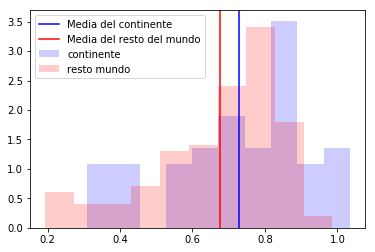


 ------------------- 

Para el continente: Africa y la variable literacy
la diferencia de medias es:  -24.890068675839927


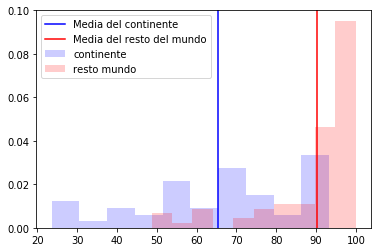


 ------------------- 

Para el continente: Africa y la variable school
la diferencia de medias es:  -4.029435599500297


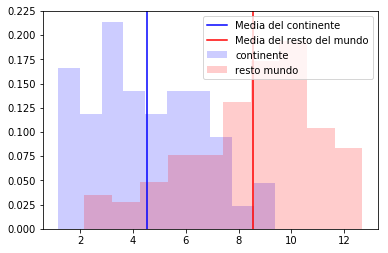


 ------------------- 

Para el continente: Americas y la variable femlab
la diferencia de medias es:  -0.04953242946700931


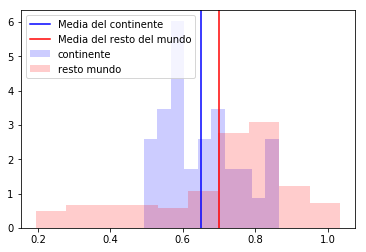


 ------------------- 

Para el continente: Americas y la variable literacy
la diferencia de medias es:  9.119076081980836


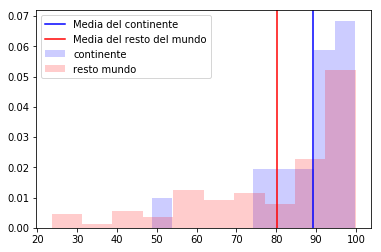


 ------------------- 

Para el continente: Americas y la variable school
la diferencia de medias es:  0.7540117535827084


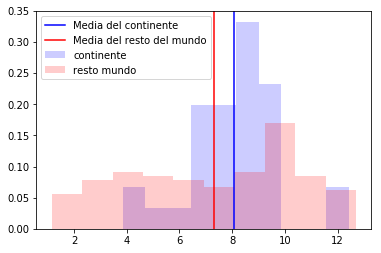


 ------------------- 

Para el continente: Asia y la variable femlab
la diferencia de medias es:  -0.11102789847123229


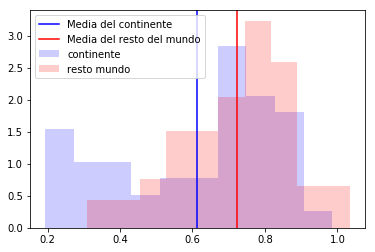


 ------------------- 

Para el continente: Asia y la variable literacy
la diferencia de medias es:  8.364497467836813


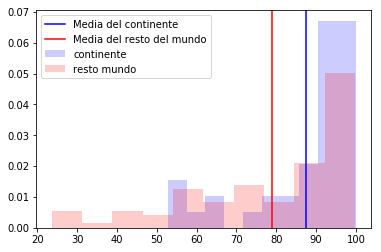


 ------------------- 

Para el continente: Asia y la variable school
la diferencia de medias es:  -0.2660317162672685


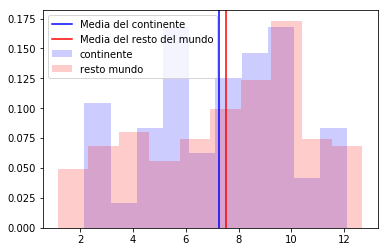


 ------------------- 

Para el continente: Europe y la variable femlab
la diferencia de medias es:  0.1011767109014583


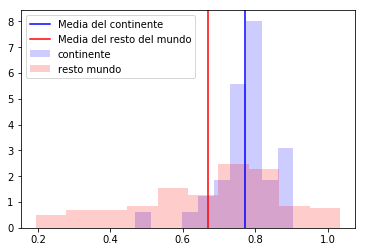


 ------------------- 

Para el continente: Europe y la variable literacy
la diferencia de medias es:  19.884573826747655


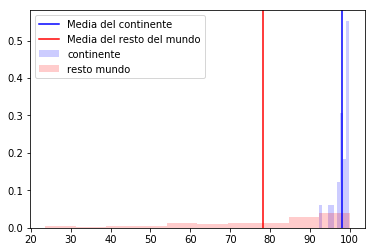


 ------------------- 

Para el continente: Europe y la variable school
la diferencia de medias es:  3.788551476339168


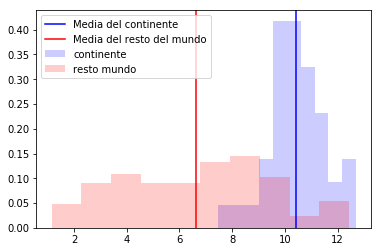


 ------------------- 

Para el continente: Oceania y la variable femlab
la diferencia de medias es:  0.033521042900189535


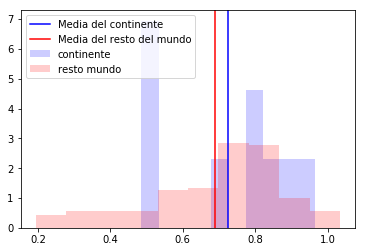


 ------------------- 

Para el continente: Oceania y la variable literacy
la diferencia de medias es:  0.4640388928926882


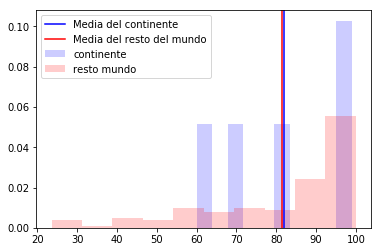


 ------------------- 

Para el continente: Oceania y la variable school
la diferencia de medias es:  1.3494799906342934


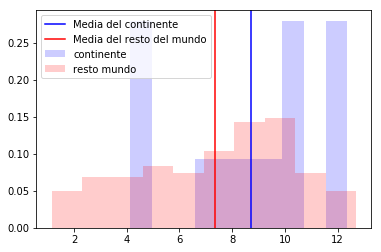

In [10]:
for i in df.region.unique():
    for j in variables:
        grafica(tmp,j,'region_'+i)

Hay casos donde es muy obvio que el contienente se comporta distinto a el resto del mundo, por ejemplo europa y su escolaridad o africa con escolaridad tambien, en relacion al test de hipotesis hay que verificar los casos donde el p-value sea mayor al criterio de aceptacion por ejemplo 0.05 donde en el caso de ser mayor no se existe evidencia estadistica para rechazar la hipotesis nula, que en este caso es que las medias son iguales